In [12]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = "AirData.csv"
air_data = pd.read_csv(file_path)

# Mostra le informazioni generali del dataset
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


## Spiegazione dei dati:
Le colonne del dataset hanno il seguente significato:
- **No**: indice della riga
- **year**: anno della misurazione
- **month**: mese della misurazione
- **day**: giorno della misurazione
- **hour**: ora della misurazione
- **pm2.5**: concentrazione delle polveri sottili
- **DEWP**: punto di rugiada
- **PRES**: pressione atmosferica
- **cbwd**: direzione del vento
- **lws**: velocità del vento
- **Is**: ore cumulative di neve
- **Ir**: ore cumulative di pioggia

Il dataset fornisce tutte informazioni interessanti, al fine di studiare la qualità dell'aria, per cui verranno mantenute tutte le colonne.

In [13]:
selected_columns = ['year','month','day','hour', 'pm2.5', 'DEWP', 'PRES','Iws', 'Is','Ir']
air_data = air_data[selected_columns].copy()

# Converte le informazioni temporali in formato datetime
air_data['datetime'] = pd.to_datetime(air_data[['year', 'month', 'day', 'hour']])
selected_columns = ['datetime', 'pm2.5', 'DEWP', 'PRES','Iws', 'Is','Ir']
air_data = air_data[selected_columns].copy()
# (Opzionale) Imposta la colonna datetime come indice per lavorare come serie temporale
air_data.set_index('datetime', inplace=True)
# Ordinare per data (giusto per sicurezza)


air_data['Is'] = (air_data['Is'] > 0).astype(int)
air_data['Ir'] = (air_data['Ir'] > 0).astype(int)

air_data.sort_index(inplace=True)
air_data = air_data.resample('W').agg({
    'pm2.5': 'mean',
    'DEWP': 'mean', 
    'PRES': 'mean',
    'Iws':'mean',
    'Is': 'sum',
    'Ir': 'sum'
})

air_data.head()

# Mostra statistiche descrittive del dataset



,pm2.5,DEWP,PRES,Iws,Is,Ir
datetime,,,,,,
2010-01-03,112.395833,-12.458333,1021.541667,36.752083,30,0
2010-01-10,74.452381,-19.976190,1031.470238,32.778571,0,0
2010-01-17,86.708333,-18.083333,1031.345238,43.464464,0,0
2010-01-24,132.992701,-14.202381,1028.255952,38.843810,0,0
2010-01-31,63.401515,-17.744048,1023.738095,51.740417,0,0


## Analisi esplorativa del dataset

Effetuiamo un'analisi visiva del dataset graficando l'andamento della concentrazione di polveri sottili

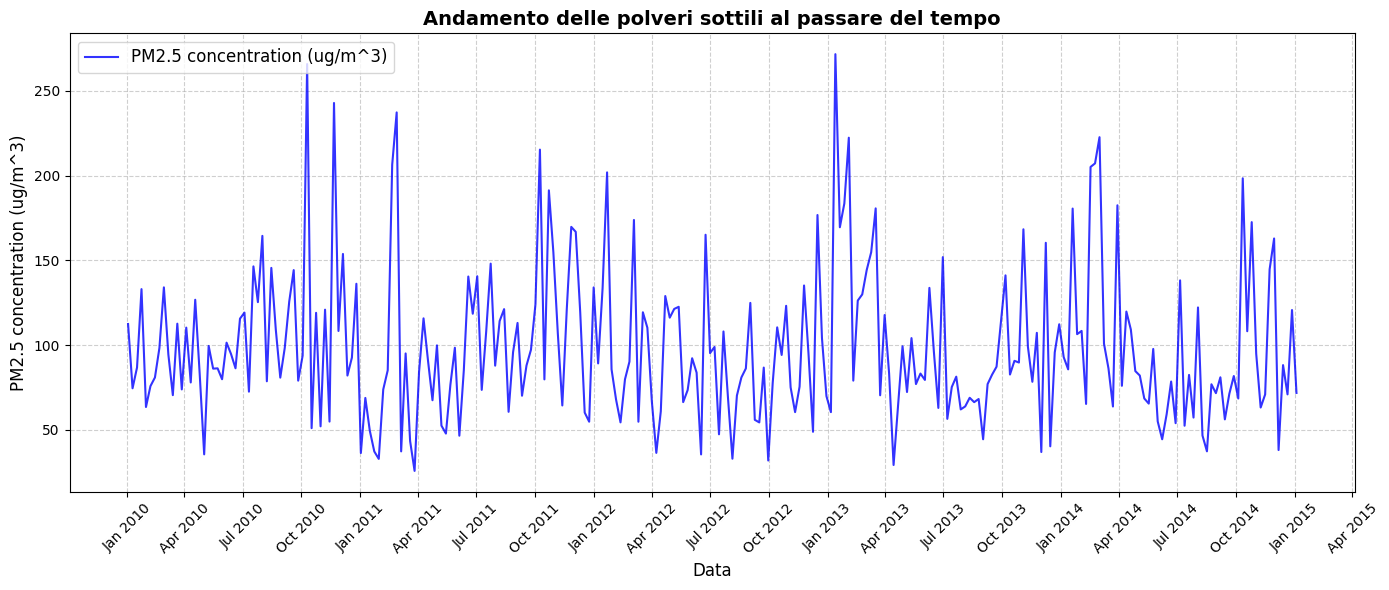

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))
plt.plot(air_data['pm2.5'], label='PM2.5 concentration (ug/m^3)', alpha=0.8, linewidth=1.5, color='blue')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formattazione mese/anno
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Intervallo di 3 mesi
plt.xticks(rotation=45)
plt.title('Andamento delle polveri sottili al passare del tempo', fontsize=14, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('PM2.5 concentration (ug/m^3)', fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

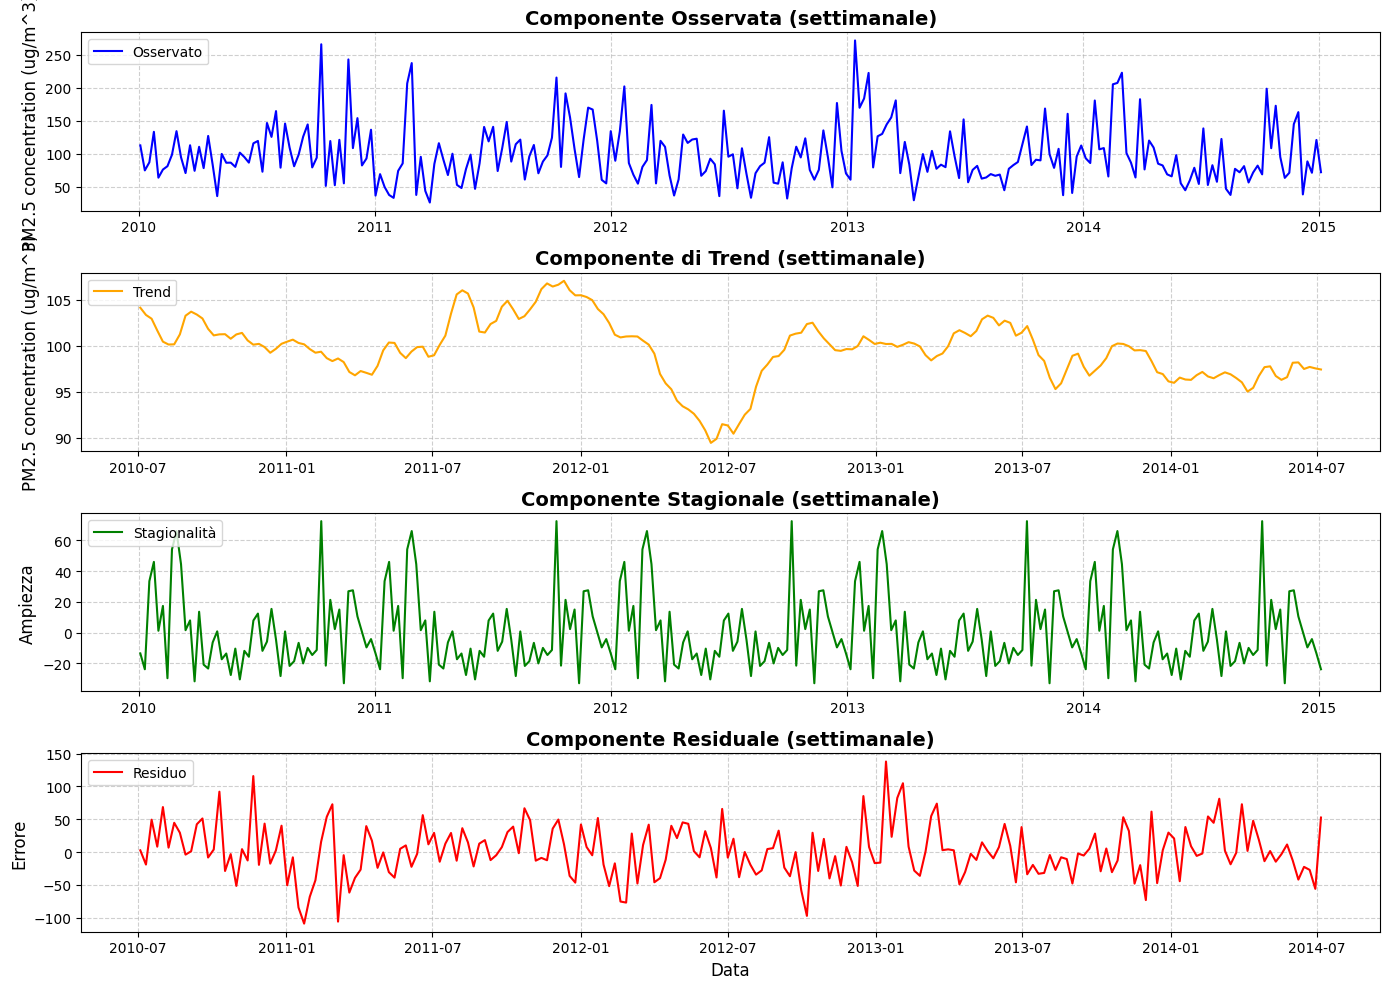

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposizione della serie temporale settimanale
decomposition = seasonal_decompose(air_data['pm2.5'], model='additive', period=52)  # 52 settimane per la stagionalità annuale
plt.figure(figsize=(14, 10))

# Osservato
plt.subplot(411)
plt.plot(decomposition.observed, label='Osservato', color='blue', linewidth=1.5)
plt.title('Componente Osservata (settimanale)', fontsize=14, fontweight='bold')
plt.ylabel('PM2.5 concentration (ug/m^3)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Trend
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange', linewidth=1.5)
plt.title('Componente di Trend (settimanale)', fontsize=14, fontweight='bold')
plt.ylabel('PM2.5 concentration (ug/m^3)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Stagionalità
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Stagionalità', color='green', linewidth=1.5)
plt.title('Componente Stagionale (settimanale)', fontsize=14, fontweight='bold')
plt.ylabel('Ampiezza', fontsize=12)
plt.legend(loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Residuo
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuo', color='red', linewidth=1.5)
plt.title('Componente Residuale (settimanale)', fontsize=14, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Errore', fontsize=12)
plt.legend(loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

La serie sembra non avere un trend, inoltre la media e la varianza sembrano rimanere costanti, dunque per ora supponiamo sia stazionaria.

In [16]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(air_data['pm2.5'].dropna())

# Raccoglie e mostra i risultati del test ADF
adf_results = pd.Series(
    {
        "ADF Test Statistic": adf_test[0],
        "p-value": adf_test[1],
        "Lags Used": adf_test[2],
        "Number of Observations": adf_test[3],
        "Critical Value (1%)": adf_test[4]["1%"],
        "Critical Value (5%)": adf_test[4]["5%"],
        "Critical Value (10%)": adf_test[4]["10%"],
    }
)

adf_results

ADF Test Statistic       -9.268388e+00
p-value                   1.347449e-15
Lags Used                 1.000000e+00
Number of Observations    2.600000e+02
Critical Value (1%)      -3.455754e+00
Critical Value (5%)      -2.872721e+00
Critical Value (10%)     -2.572728e+00
dtype: float64

Il p-value è sotto la soglia 0.05, dunque si può confermare che la serie sia stazionaria. Procediamo con l'analisi dei correlogrammi ACF e PACF.

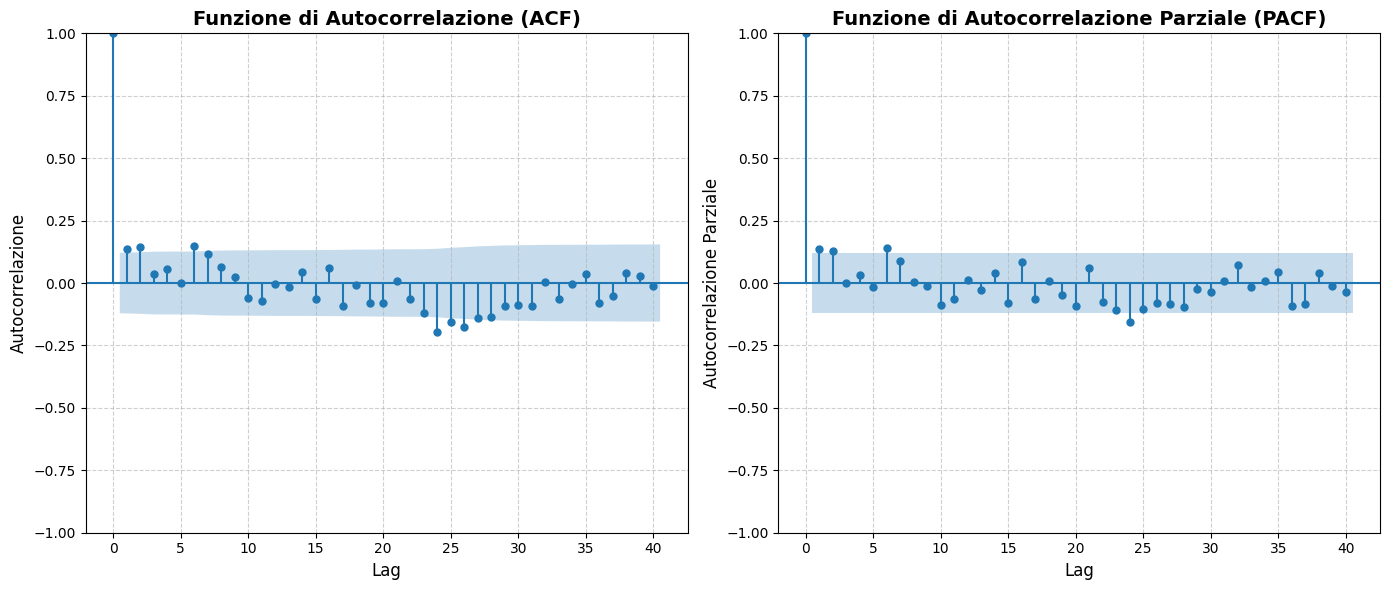

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Creazione dei grafici ACF e PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=100)

# ACF
plot_acf(air_data['pm2.5'].dropna(), lags=40, ax=axes[0])
axes[0].set_title('Funzione di Autocorrelazione (ACF)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Lag', fontsize=12)
axes[0].set_ylabel('Autocorrelazione', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# PACF
plot_pacf(air_data['pm2.5'].dropna(), lags=40, ax=axes[1])
axes[1].set_title('Funzione di Autocorrelazione Parziale (PACF)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Lag', fontsize=12)
axes[1].set_ylabel('Autocorrelazione Parziale', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Mostra i grafici
plt.tight_layout()
plt.show()

dall'analisi si deducono parametri p=1, d=0, q=1.

In [19]:
import numpy; print(numpy.__version__)

2.2.4


In [18]:
from pmdarima import auto_arima

# Utilizzo di auto_arima per trovare i parametri migliori
auto_arima_model = auto_arima(
    air_data['pm2.5'],
    seasonal=False,  # Nessuna stagionalità per ora
    trace=True,      # Mostrare il processo
    error_action='ignore',  # Ignora errori
    suppress_warnings=True, # Sopprimi i warning
    stepwise=True,          # Approccio iterativo per trovare i migliori parametri
    max_order=10            # Limite sulla somma di p+d+q
)
# Mostrare i parametri migliori trovati
print(auto_arima_model.summary())

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject